#이미지 dataset 설정

In [34]:
# 작업 경로 설정
import os
os.chdir(r"/content/drive/MyDrive/Colab Notebooks/00.study/10.knou")
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/00.study/10.knou
02_패턴인식기_2차원데이터.ipynb  digitimages_binary.zip
02_패턴인식기_영상데이터.ipynb


In [35]:
!rm -rf ./number_images
!unzip ./digitimages_binary.zip -d ./number_images
!ls ./number_images

Archive:  ./digitimages_binary.zip
  inflating: ./number_images/digit0_1.bmp  
  inflating: ./number_images/digit0_2.bmp  
  inflating: ./number_images/digit0_3.bmp  
  inflating: ./number_images/digit0_4.bmp  
  inflating: ./number_images/digit0_5.bmp  
  inflating: ./number_images/digit0_6.bmp  
  inflating: ./number_images/digit0_7.bmp  
  inflating: ./number_images/digit1_1.bmp  
  inflating: ./number_images/digit1_2.bmp  
  inflating: ./number_images/digit1_3.bmp  
  inflating: ./number_images/digit1_4.bmp  
  inflating: ./number_images/digit1_5.bmp  
  inflating: ./number_images/digit1_6.bmp  
  inflating: ./number_images/digit1_7.bmp  
  inflating: ./number_images/digit2_1.bmp  
  inflating: ./number_images/digit2_2.bmp  
  inflating: ./number_images/digit2_3.bmp  
  inflating: ./number_images/digit2_4.bmp  
  inflating: ./number_images/digit2_5.bmp  
  inflating: ./number_images/digit2_6.bmp  
  inflating: ./number_images/digit2_7.bmp  
  inflating: ./number_images/digit3_1.bmp

# 이미지 데이터 행렬 변환

In [31]:
import cv2 as cv
cv.__version__

'4.1.2'

## 이미지 한개 이진화 

### opencv 사용 방식 - 연습용

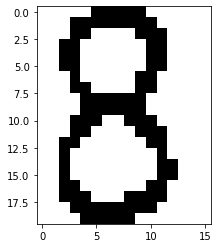

In [32]:
image_unchange = cv.imread("./number_images/digit8_1.bmp", cv.IMREAD_UNCHANGED)
image_unchange.size, image_unchange.shape, type(image_unchange)
import matplotlib.pyplot as plt
plt.imshow(image_unchange, cmap='gray')

In [33]:
image_bgr = cv.imread("./number_images/digit8_1.bmp")
image_bgr.size, image_bgr.shape, type(image_bgr)

(960, (20, 16, 3), numpy.ndarray)

In [34]:
dim = (16,20)  # (width, height)
image_bgr = cv.resize(image_bgr, dim)
image_gray = cv.cvtColor(image_bgr, cv.COLOR_BGR2GRAY)
image_gray.size, image_gray.shape, type(image_gray)

(320, (20, 16), numpy.ndarray)

In [35]:
ret, image_binary = cv.threshold (image_gray, 127, 255, cv.THRESH_BINARY_INV)
image_binary.size, image_binary.shape, type(image_binary)

(320, (20, 16), numpy.ndarray)

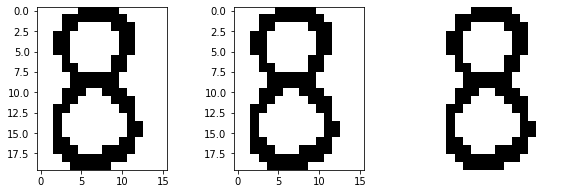

In [36]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
plt.axis("off")
axs[0].imshow(image_bgr)
axs[1].imshow(image_gray, cmap='gray')
axs[2].imshow(image_binary, cmap=plt.cm.binary)

In [37]:
digit_flat = image_binary.reshape(-1)
digit_flat.size, digit_flat.shape

(320, (320,))

### Pillow 사용 방식

In [38]:
from PIL import Image 
image_binary = Image.open("./number_images/digit8_1.bmp") # open colour image
image_binary.format, image_binary.size, image_binary.mode,  type(image_binary)

('BMP', (16, 20), '1', PIL.BmpImagePlugin.BmpImageFile)

In [41]:
import numpy as np
image_binary = np.array(image_binary)
image_binary.shape, type(image_binary)

((20, 16), numpy.ndarray)

In [42]:
digit_flat = image_binary.reshape(-1)
digit_flat.size, digit_flat.shape

(320, (320,))